In [74]:
import pandas as pd

In [92]:
ds = pd.read_csv('../../datasets/built_dataset.csv')
ds.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,sale,No
3,xixia mushroom,mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,sale,No
4,paopaojiao,capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,sale,No


In [76]:
# Remove the unnecessary columns 
df = ds.drop(columns=['Unit Selling Price (RMB/kg)','Discount (Yes/No)'])
df.head(10)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,sale
5,red hang pepper,capsicum,2021-01-01,09:30:45.120,102900005116943,0.171,sale
6,xixia mushroom,mushroom,2021-01-01,09:32:11.467,102900005116530,0.161,sale
7,paopaojiao,capsicum,2021-01-01,09:32:16.998,102900005117056,0.350,sale
8,paopaojiao,capsicum,2021-01-01,09:33:05.061,102900005117056,0.300,sale
9,luosi pepper,capsicum,2021-01-01,09:33:17.639,102900011000328,0.411,sale


In [77]:
#Checking the sum of missing value for each column
df.isnull().sum()

Item Name               0
Category Name           0
Date                    0
Time                    0
Item Code               0
Quantity Sold (kilo)    0
Sale or Return          0
dtype: int64

In [78]:
# Check the duplicate data 
df.duplicated().sum()

0

In [79]:
# Remove the minutes,seconds and milliseconds in time 
df['Time'] = df['Time'].apply(lambda x: x.split(':')[0])
df.head(100)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606,sale
...,...,...,...,...,...,...,...
95,niushou youcai,flower,2021-01-01,10,102900005115861,0.388,sale
96,xixia mushroom,mushroom,2021-01-01,10,102900005116530,0.223,sale
97,zhijiang red bolt,flower,2021-01-01,10,102900005122654,0.473,sale
98,paopaojiao,capsicum,2021-01-01,10,102900005117056,0.389,sale


In [80]:
# Check the values of each category name
df['Category Name'].value_counts()

Category Name
flower      203383
capsicum    131143
mushroom     60398
aquatic      37928
solanum      26788
cabbage      15788
Name: count, dtype: int64

In [81]:
# Remove all the return values 
df = df[df['Sale or Return'] != 'return']
df

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606,sale
...,...,...,...,...,...,...,...
475423,luosi pepper,capsicum,2022-12-31,21,102900011032251,1.000,sale
475424,wawacai,flower,2022-12-31,21,102900005118831,1.000,sale
475425,yunnan lettuce,flower,2022-12-31,21,102900011030059,1.000,sale
475426,wawacai,flower,2022-12-31,21,102900005118831,1.000,sale


In [82]:
# prove that there is no return values
return_rows = df[df['Sale or Return'] == 'Return']
return_rows

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return


In [83]:
# Remove the sale or return value because in the df now all are sale items 
df = df.drop(columns='Sale or Return')
df.head(5)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo)
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606


In [84]:
# 2021 sales
df['Date'] = pd.to_datetime(df['Date'])
df_2021 = df[df['Date'].dt.year == 2021]
df_2021.head(5)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo)
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606


In [85]:
# 2022 sales
df['Date'] = pd.to_datetime(df['Date'])
df_2022 = df[df['Date'].dt.year == 2022]
df_2022.head(5)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo)
262584,net lotus root,aquatic,2022-01-01,09,102900005116899,0.470
262585,wuhu green pepper,capsicum,2022-01-01,09,102900011016701,0.206
262586,caixin,flower,2022-01-01,09,102900005115908,0.302
262587,xixia mushroom,mushroom,2022-01-01,09,102900005116530,0.401
262588,shanghaiqing,flower,2022-01-01,09,102900005115823,0.484


In [86]:
# Monthly sales Quantity Sold (kilo) in 2021
sales_data_2021 = df_2021.groupby(df_2021['Date'].dt.month)['Quantity Sold (kilo)'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
sales_data_2021

,Month,Quantity Sold (kilo)
0,1,10226
1,2,13239
2,3,9746
3,4,8466
4,5,9174
5,6,8434
6,7,9439
7,8,11933
8,9,8901
9,10,8151


In [87]:
# Monthly sales Quantity Sold (kilo) in 2022
sales_data_2022 = df_2022.groupby(df_2022['Date'].dt.month)['Quantity Sold (kilo)'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
sales_data_2022

,Month,Quantity Sold (kilo)
0,1,10478
1,2,7477
2,3,7210
3,4,6767
4,5,6350
5,6,6881
6,7,10580
7,8,18228
8,9,13234
9,10,16128


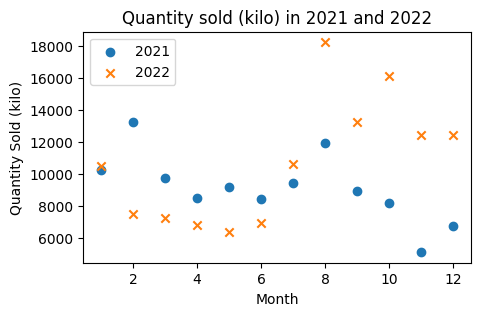

In [88]:
import matplotlib.pyplot as plt
# Plotting the scatter plot for 2021 and 2022 on the same plot
plt.figure(figsize=(5, 3))
plt.scatter(sales_data_2021['Month'], sales_data_2021['Quantity Sold (kilo)'], label='2021', marker='o')
plt.scatter(sales_data_2022['Month'], sales_data_2022['Quantity Sold (kilo)'], label='2022', marker='x')

plt.title('Quantity sold (kilo) in 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (kilo)')
plt.legend()
plt.show()

In [89]:
# within the one hour max value of sold quantity sold (kilo) in 2021
highest_sales_in_day_2021 = df_2021.groupby(pd.to_datetime(df_2021['Time'], format='%H').dt.hour)['Quantity Sold (kilo)'].max().reset_index().rename(columns={"Time": "Hour"})
highest_sales_in_day_2021

,Hour,Quantity Sold (kilo)
0,9,7.218
1,10,5.418
2,11,15.000
3,12,5.000
4,13,10.000
5,14,3.060
6,15,3.696
7,16,3.690
8,17,3.883
9,18,5.000


In [90]:
# within the one hour max value of sold quantity sold (kilo) in 2022
highest_sales_in_day_2022 = df_2022.groupby(pd.to_datetime(df_2022['Time'], format='%H').dt.hour)['Quantity Sold (kilo)'].max().reset_index().rename(columns={"Time": "Hour"})
highest_sales_in_day_2022

,Hour,Quantity Sold (kilo)
0,9,160.000
1,10,12.500
2,11,10.000
3,12,5.000
4,13,7.930
5,14,7.000
6,15,5.000
7,16,10.000
8,17,17.000
9,18,9.000


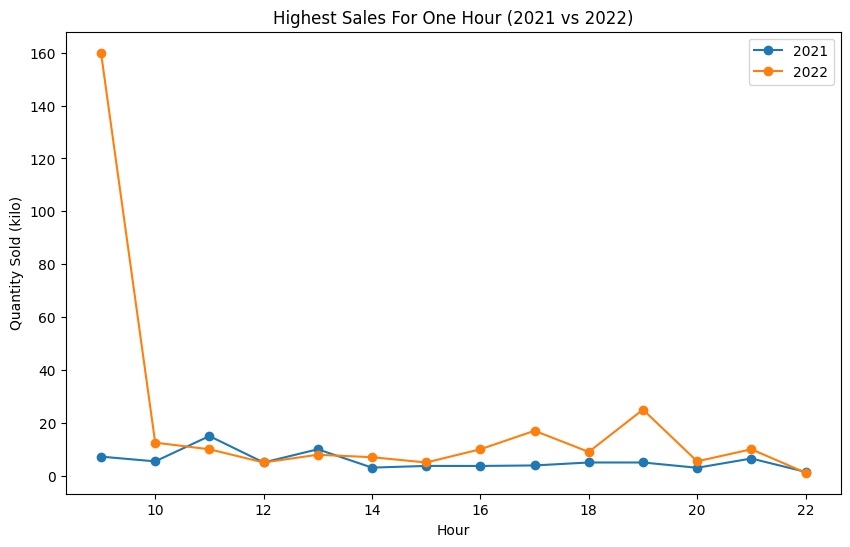

In [91]:
# Plot the different between 2021 and 2022 Quantity Sold (kilo) for hour
import matplotlib.pyplot as plt

# Plotting the difference
plt.figure(figsize=(10, 6))
plt.plot(highest_sales_in_day_2021['Hour'], highest_sales_in_day_2021['Quantity Sold (kilo)'], label='2021', marker='o')
plt.plot(highest_sales_in_day_2022['Hour'], highest_sales_in_day_2022['Quantity Sold (kilo)'], label='2022', marker='o')

plt.title('Highest Sales For One Hour (2021 vs 2022)')
plt.xlabel('Hour')
plt.ylabel('Quantity Sold (kilo)')
plt.legend()
plt.show()